In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import make_pipeline
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

df = pd.read_excel("Data.xlsx")
review_column = 'Review'
nlp = spacy.load("en_core_web_sm") #preprocessing the data

def preprocess(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if token.is_alpha and token.lemma_.lower() not in STOP_WORDS]
    return " ".join(tokens)

df['processed_reviews'] = df[review_column].apply(preprocess)

# CountVectorizer and LDA for topic modeling
vectorizer = CountVectorizer(max_df=0.85, stop_words='english')
lda = LatentDirichletAllocation(n_components=5, random_state=42)

model = make_pipeline(vectorizer, lda)

#MOdel fittting
document_term_matrix = model.fit_transform(df['processed_reviews'])

# Getting the dominant topic for each review
df['dominant_topic'] = document_term_matrix.argmax(axis=1)

topic_counts = df['dominant_topic'].value_counts()
print("Topic Occurrence:")
print(topic_counts)

feature_names = vectorizer.get_feature_names_out()
topic_keywords = []

for topic_weights in lda.components_:
    top_keyword_indices = topic_weights.argsort()[:-10 - 1:-1]
    topic_keywords.append([feature_names[i] for i in top_keyword_indices])

print("\nTop Keywords for Each Topic:")
for i, keywords in enumerate(topic_keywords):
    print(f"Topic {i}: {', '.join(keywords)}")


Topic Occurrence:
4    2568
1    2519
0    1677
3    1447
2     965
Name: dominant_topic, dtype: int64

Top Keywords for Each Topic:
Topic 0: good, excellent, friendly, service, room, user, stay, staff, clean, breakfast
Topic 1: use, app, easy, bank, banking, step, verification, bad, account, love
Topic 2: great, app, nice, awesome, work, experience, convenient, banking, thank, problem
Topic 3: work, deposit, app, cheque, update, time, try, fix, issue, check
Topic 4: app, account, phone, work, log, time, try, sign, update, crash


Top Trigrams and Their Frequencies:
good easy use: 11.197587803539049
super easy use: 10.198704232472645
step verification work: 9.21257738891007
try deposit cheque: 8.200050821487087
deposit cheque work: 8.19847619047662
activate step verification: 7.206541100325756
app work fine: 7.202573550611335
picture cheque deposit: 6.207104139018346
set step verification: 6.2028719077754815
step verification process: 5.214779932078592
force step verification: 5.211739893014795
app easy navigate: 5.205589049833503
app work great: 5.204955246014284
photo cheque deposit: 5.2003433957345395
easy use good: 4.221223935319721
impossible deposit cheque: 4.212508722481727
app stop work: 4.211830329958042
bad banking app: 4.204271011106613
cheque deposit feature: 4.2036271638839064
absolute garbage app: 4.199964052954749


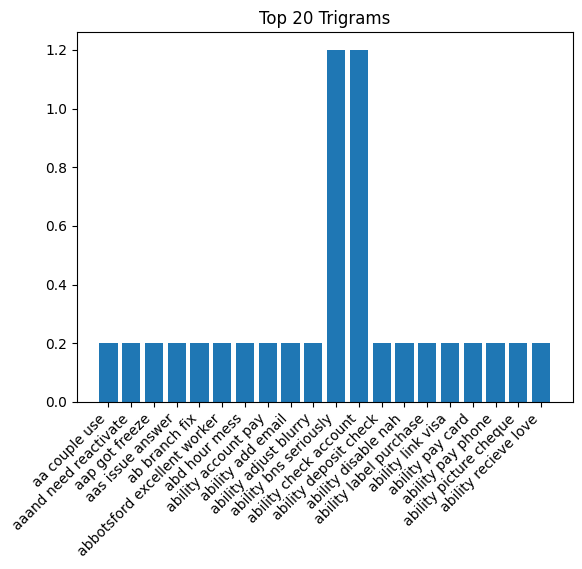

In [9]:
import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")

excel_file_path = '/content/Data.xlsx'
df = pd.read_excel(excel_file_path)

text_column_name = 'Review'

def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in STOP_WORDS]
    return " ".join(tokens)

df['processed_reviews'] = df[text_column_name].apply(preprocess)

vectorizer = CountVectorizer(ngram_range=(3, 3))
trigram_matrix = vectorizer.fit_transform(df['processed_reviews'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda_matrix = lda.fit_transform(trigram_matrix)

feature_names = vectorizer.get_feature_names_out()
trigram_frequencies = zip(feature_names, lda.components_[0])
sorted_trigrams = sorted(trigram_frequencies, key=lambda x: x[1], reverse=True)

print("Top Trigrams and Their Frequencies:")
for trigram, frequency in sorted_trigrams[:20]:
    print(f"{trigram}: {frequency}")

plt.bar(range(20), lda.components_[0][:20], tick_label=feature_names[:20])
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Trigrams')
plt.show()


In [14]:
import pandas as pd
import spacy
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Load data
excel_file_path = '/content/Data.xlsx'
df = pd.read_excel(excel_file_path)

# Specify the column containing reviews
text_column_name = 'Review'

# Preprocess the data
def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in nlp.Defaults.stop_words]
    return " ".join(tokens)

df['processed_reviews'] = df[text_column_name].apply(preprocess)

# Extract word embeddings for each review
word_embeddings = np.array([nlp(review).vector for review in df['processed_reviews']])

# Normalize the word embeddings
word_embeddings /= np.linalg.norm(word_embeddings, axis=1, keepdims=True)

# Compute cosine similarity between word embeddings
similarity_matrix = np.dot(word_embeddings, word_embeddings.T)

# Apply Latent Dirichlet Allocation (LDA) for topic modeling based on similarity matrix
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda_matrix = lda.fit_transform(similarity_matrix)

# Display reviews and their assigned topics
df['topic'] = lda_matrix.argmax(axis=1)

# Display the reviews along with their assigned topics
print("Review and Assigned Topic:")
for review, topic in zip(df['Review'], df['topic']):
    print(f"Review: {review[:50]}... Topic: {topic}")

# Plot the distribution of topics
plt.hist(df['topic'], bins=range(6), align='left', edgecolor='black')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Topics')
plt.show()


<ipython-input-14-7e60c96ae32f>:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  word_embeddings = np.array([nlp(review).vector for review in df['processed_reviews']])


AxisError: axis 1 is out of bounds for array of dimension 1